# BÀI TẬP 2 GIỮA KÌ MÔN KHOA HỌC DỮ LIỆU
[link to dataset](https://covid19.who.int/data)

For this data science project, we will analyze the data of global COVID-19 daily cases and deaths by date reported to WHO, as of the end of 2021, from the [WHO COVID-19 Dashboard](https://covid19.who.int/data). The data contains the following fields:

* Date_reported: Date variable, Date of reporting to WHO.
* Country_code: String variable, ISO Alpha-2 country code.
* Country: String variable, country, territory, area.
* WHO_region: String variable, WHO regional offices: WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO).
* New_cases: Integer variable, New confirmed cases. Calculated by subtracting previous cumulative case count from current cumulative cases count.*
* Cumulative_cases: Integer variable, Cumulative confirmed cases reported to WHO to date.
* New_deaths: Integer variable, New confirmed deaths. Calculated by subtracting previous cumulative deaths from current cumulative deaths.*
* Cumulative_deaths: Integer variable, Cumulative confirmed deaths reported to WHO to date.

> *New case and death counts: Counts of new cases and deaths are calculated by subtracting previous cumulative total counts from the current count. These counts are updated incrementally throughout the day as more information becomes available. Daily new case and death counts are complete by 23:59 CET/CEST each day. Due to differences in reporting methods, cut-off times, retrospective data consolidation and reporting delays, the number of new cases may not always reflect daily totals published by individual countries, territories or areas. Due to the recent trend of countries conducting data reconciliation exercises which remove large numbers of cases or deaths from their total counts, such data may reflect as negative numbers in the new cases / new deaths counts as appropriate. This will aid users in identifying when such adjustments occur. When additional details become available that allow the subtractions to be suitably apportioned to previous days, data will be updated accordingly.


## Data and Setup

____
**Import numpy and pandas**

In [2]:
import numpy as np
import pandas as pd

**Import visualization libraries**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

**Read in the csv file as a dataframe called df**

In [4]:
df = pd.read_csv('WHO-COVID-19-global-data.csv')

**Check the info of the df**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172773 entries, 0 to 172772
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      172773 non-null  object
 1   Country_code       172044 non-null  object
 2   Country            172773 non-null  object
 3   WHO_region         172773 non-null  object
 4   New_cases          172773 non-null  int64 
 5   Cumulative_cases   172773 non-null  int64 
 6   New_deaths         172773 non-null  int64 
 7   Cumulative_deaths  172773 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 10.5+ MB


**Check the head of df**

In [51]:
df.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0


## Basic Questions

**How many countries, territories, areas are there in the dataset?**

In [52]:
df['Country'].nunique()

237

**what are the top 5 countries for cumulative cases?**

In [53]:
df[df['Date_reported']=='2021-12-31'].sort_values('Cumulative_cases', ascending=False)[['Country', 'Cumulative_cases']].head(5)

,Country,Cumulative_cases
165482,United States of America,53534286
70712,India,34838804
21140,Brazil,22263834
154547,The United Kingdom,13441671
128303,Russian Federation,10499982


**What are the top 5 country for cumulative deaths?**

In [54]:
df[df['Date_reported']=='2021-12-31'].sort_values('Cumulative_deaths', ascending=False)[['Country', 'Cumulative_deaths']].head(5)

,Country,Cumulative_deaths
165482,United States of America,819055
21140,Brazil,618817
70712,India,481080
128303,Russian Federation,308860
98414,Mexico,303822


## Creating new features

**We first focus on the time information. The data type of the objects in the Date_reported column is?**

In [23]:
type(df['Date_reported'].iloc[0])

str

**These date reported are still string. We need to convert it to DateTime objects.**

In [24]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
type(df['Date_reported'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**From this, we create a new column called Year_month_reported**

In [28]:
df['Year_month_reported'] = df['Date_reported'].dt.to_period('M')

## Visualize the data

**For better visualization, we group the data by reported year and month**

In [55]:
by_year_month = df.groupby(['Year_month_reported', 'Country', 'WHO_region']).sum().reset_index()
by_year_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5688 entries, 0 to 5687
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   Year_month_reported  5688 non-null   period[M]
 1   Country              5688 non-null   object   
 2   WHO_region           5688 non-null   object   
 3   New_cases            5688 non-null   int64    
 4   Cumulative_cases     5688 non-null   int64    
 5   New_deaths           5688 non-null   int64    
 6   Cumulative_deaths    5688 non-null   int64    
dtypes: int64(4), object(2), period[M](1)
memory usage: 311.2+ KB


**Then we sum up all the reports by country by reported year month**

In [48]:
sums_by_year_month = by_year_month.groupby('Year_month_reported').sum()
sums_by_year_month.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 24 entries, 2020-01 to 2021-12
Freq: M
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   New_cases          24 non-null     int64
 1   Cumulative_cases   24 non-null     int64
 2   New_deaths         24 non-null     int64
 3   Cumulative_deaths  24 non-null     int64
dtypes: int64(4)
memory usage: 960.0 bytes


**Total cases and deaths over time**

We create a simple line plot of the dataframe indicating the cumulative cases over time

Text(0.5, 1.0, 'Cumulative cases')

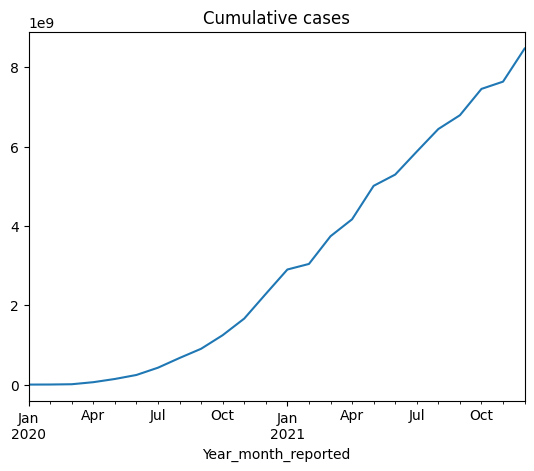

In [59]:
sums_by_year_month['Cumulative_cases'].plot()
plt.title('Cumulative cases')

We do the same for cumulative deaths over time

Text(0.5, 1.0, 'Cumulative deaths')

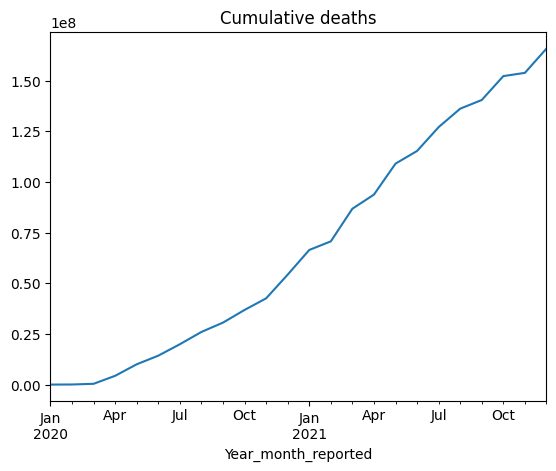

In [60]:
sums_by_year_month['Cumulative_deaths'].plot()
plt.title('Cumulative deaths')

**New cases and deaths over time**

We repeated the above operation for new cases and deaths over time

Text(0.5, 1.0, 'New cases')

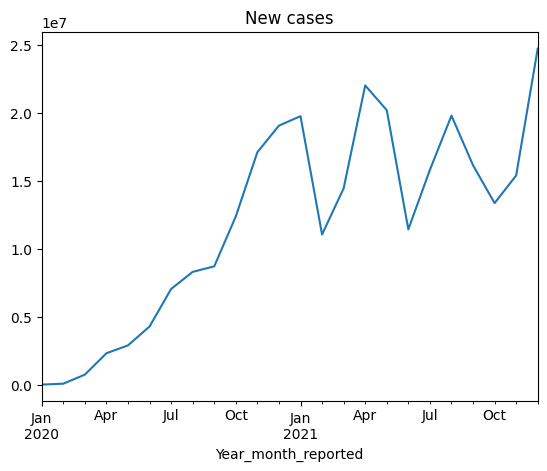

In [57]:
sums_by_year_month['New_cases'].plot()
plt.title('New cases')

Text(0.5, 1.0, 'New deaths')

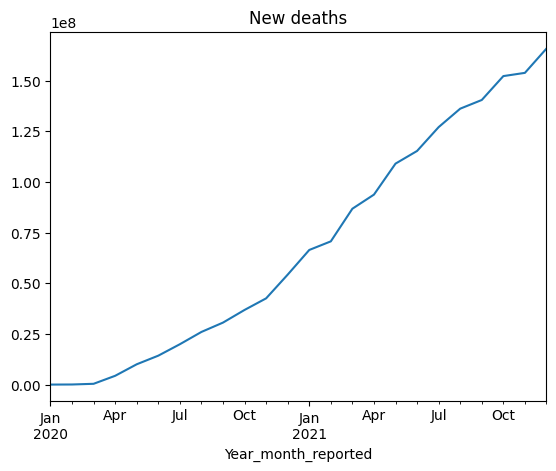

In [58]:
sums_by_year_month['Cumulative_deaths'].plot()
plt.title('New deaths')

**We continue to group the existing dataframe by the WHO region**

In [65]:
sums_by_WHO_region = by_year_month.groupby(['Year_month_reported', 'WHO_region']).sum().reset_index()
sums_by_WHO_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   Year_month_reported  168 non-null    period[M]
 1   WHO_region           168 non-null    object   
 2   New_cases            168 non-null    int64    
 3   Cumulative_cases     168 non-null    int64    
 4   New_deaths           168 non-null    int64    
 5   Cumulative_deaths    168 non-null    int64    
dtypes: int64(4), object(1), period[M](1)
memory usage: 8.0+ KB


___
**Let's move on to creating heatmap with seaborn and our data**

**We create a heatmap using the new dataframe**

<AxesSubplot: xlabel='WHO_region', ylabel='Year_month_reported'>

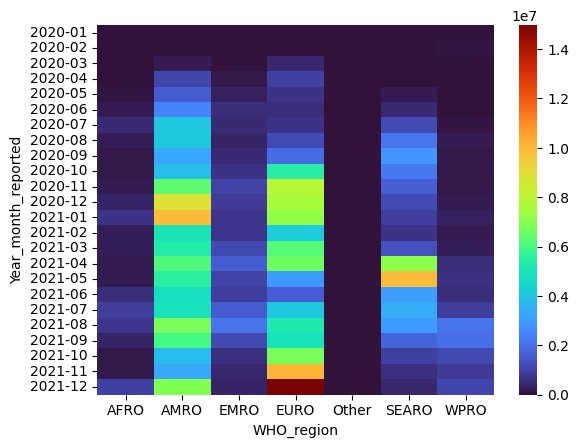

In [86]:
sns.heatmap(sums_by_WHO_region.pivot('Year_month_reported', 'WHO_region', 'New_cases'), cmap='turbo')